In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()

In [64]:
my_dir = "../../data/"
fat_df = pd.read_csv(my_dir + "faturamento_lojas_atuais.csv")
lja_df = pd.read_csv(my_dir + "lojas_atuais.csv")
exp_df = pd.read_csv(my_dir + "cenarios_expansao.csv")
ibge_df = pd.read_excel(my_dir + "ibge.xls")

In [65]:
lja_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cod_loja       3130 non-null   int64  
 1   cod_ap         3130 non-null   int64  
 2   cod_municipio  3130 non-null   int64  
 3   feature_01     1171 non-null   object 
 4   feature_02     3130 non-null   object 
 5   feature_03     3130 non-null   bool   
 6   feature_04     3130 non-null   float64
 7   feature_05     3130 non-null   object 
 8   feature_06     3130 non-null   int64  
 9   feature_07     3130 non-null   float64
 10  feature_08     3130 non-null   float64
 11  feature_09     3130 non-null   float64
 12  feature_10     3130 non-null   float64
 13  feature_11     245 non-null    object 
 14  feature_12     245 non-null    object 
 15  feature_13     874 non-null    float64
 16  feature_14     874 non-null    float64
 17  feature_15     874 non-null    float64
 18  feature_

In [29]:
lja_df.feature_05.unique()
f01_counts = lja_df.feature_01.value_counts()
f02_counts = lja_df.feature_02.value_counts()
f05_counts = lja_df.feature_05.value_counts()
f11_counts = lja_df.feature_11.value_counts()
f12_counts = lja_df.feature_12.value_counts()

merge_df = lja_df.merge(fat_df)

In [100]:
merge_df["datetime"] = pd.to_datetime(merge_df.ano*100 + merge_df.mes, format='%Y%m')
q1 = [1, 2]
jf16_df = merge_df[merge_df.mes.isin(q1)]
jf16_df = jf16_df[jf16_df.ano == 2016]

In [118]:
rmjf16_df = jf16_df.groupby(['cod_loja', 'mes', 'ano'], as_index=False).sum()
rmjf16_df.cod_loja.unique()

lojas_sem_jf = []
for i in rmjf16_df["cod_loja"].unique():
    if rmjf16_df[rmjf16_df["cod_loja"] == i].shape[0] != 2:
        lojas_sem_jf.append(i)
    
str(len(lojas_sem_jf)) + " lojas sem jan e fev 2016"
rmjf16_df

,cod_loja,mes,ano,cod_ap,cod_municipio,feature_03,feature_04,feature_06,feature_07,feature_08,feature_09,feature_10,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,qtde,receita
0,1,1,2016,57757084070028,57757084,14,304.64,434,2.364901,2.347230,1623.423877,32.897497,0.0,0.0,0.0,0.0,0.0,0.0,13034.0,441833.37
1,1,2,2016,57757084070028,57757084,14,304.64,434,2.364901,2.347230,1623.423877,32.897497,0.0,0.0,0.0,0.0,0.0,0.0,11411.0,395340.22
2,2,1,2016,74201512070056,74201512,14,308.00,378,3.023537,2.762015,21877.447441,51.392363,0.0,0.0,0.0,0.0,0.0,0.0,1425.0,54660.39
3,2,2,2016,74201512070056,74201512,14,308.00,378,3.023537,2.762015,21877.447441,51.392363,0.0,0.0,0.0,0.0,0.0,0.0,1269.0,49120.72
4,3,1,2016,49704312070728,49704312,14,639.24,84,2.661431,2.507959,78314.676482,39.422368,0.0,0.0,0.0,0.0,0.0,0.0,4352.0,161428.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,3685,2,2016,57621256042028,57621256,0,616.56,98,3.176969,3.363542,236.074131,62.381642,1400.0,1001.0,1400.0,1400.0,1386.0,1332.8,4014.0,145430.99
6052,3686,1,2016,49135800042014,49135800,0,444.64,56,1.880951,1.904397,287.915674,55.061748,0.0,0.0,0.0,0.0,0.0,0.0,2603.0,85259.81
6053,3686,2,2016,49135800042014,49135800,0,444.64,56,1.880951,1.904397,287.915674,55.061748,0.0,0.0,0.0,0.0,0.0,0.0,1592.0,53781.67
6054,3687,1,2016,58963828014014,58963828,0,371.00,28,2.797963,2.709439,107.821558,62.363580,0.0,0.0,0.0,0.0,0.0,0.0,1530.0,48988.51


In [130]:
df = rmjf16_df[~rmjf16_df.cod_loja.isin(lojas_sem_jf).values]
df['jf_prop'] = df['receita'].pct_change()

<ipython-input-130-6134c30a8738>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['jf_prop'] = df['receita'].pct_change()


In [132]:
rel_df = df[df['mes'] == 2][['cod_loja', 'jf_prop']]

In [169]:
rel_df = rel_df.merge(lja_df, on='cod_loja')[['cod_loja', 'jf_prop', 'feature_12']].dropna()

In [170]:
rel_df.feature_12.unique()

array(['FEATURE_12_VALUE_01', 'FEATURE_12_VALUE_02'], dtype=object)

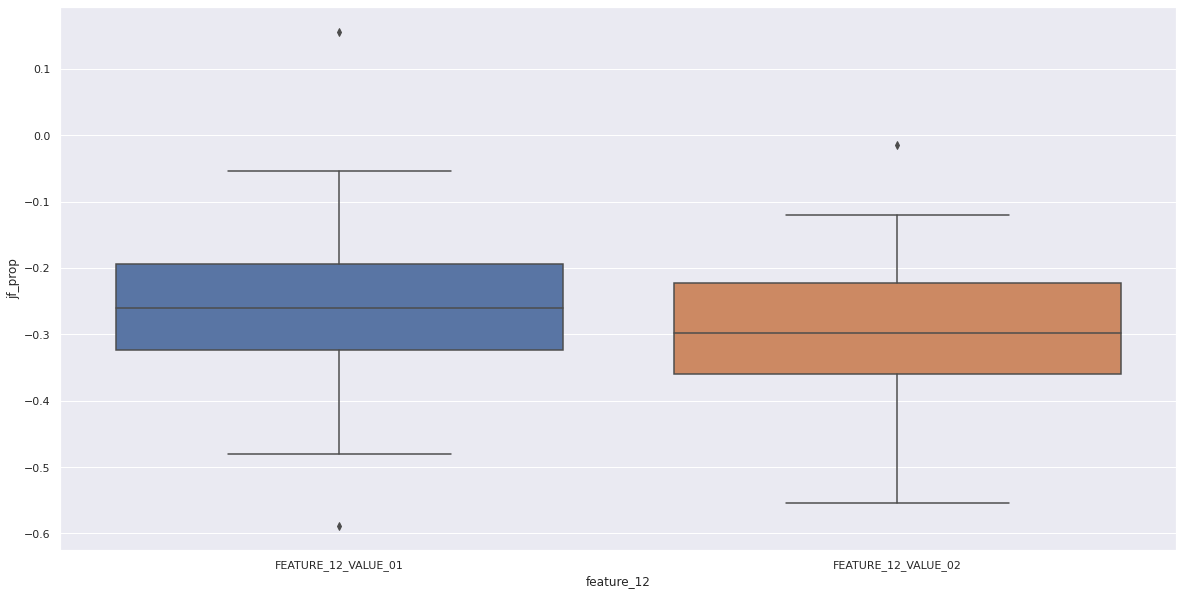

In [171]:
plt.figure(figsize=(20,10))
sns.boxplot(x=rel_df.feature_12, y=rel_df.jf_prop)

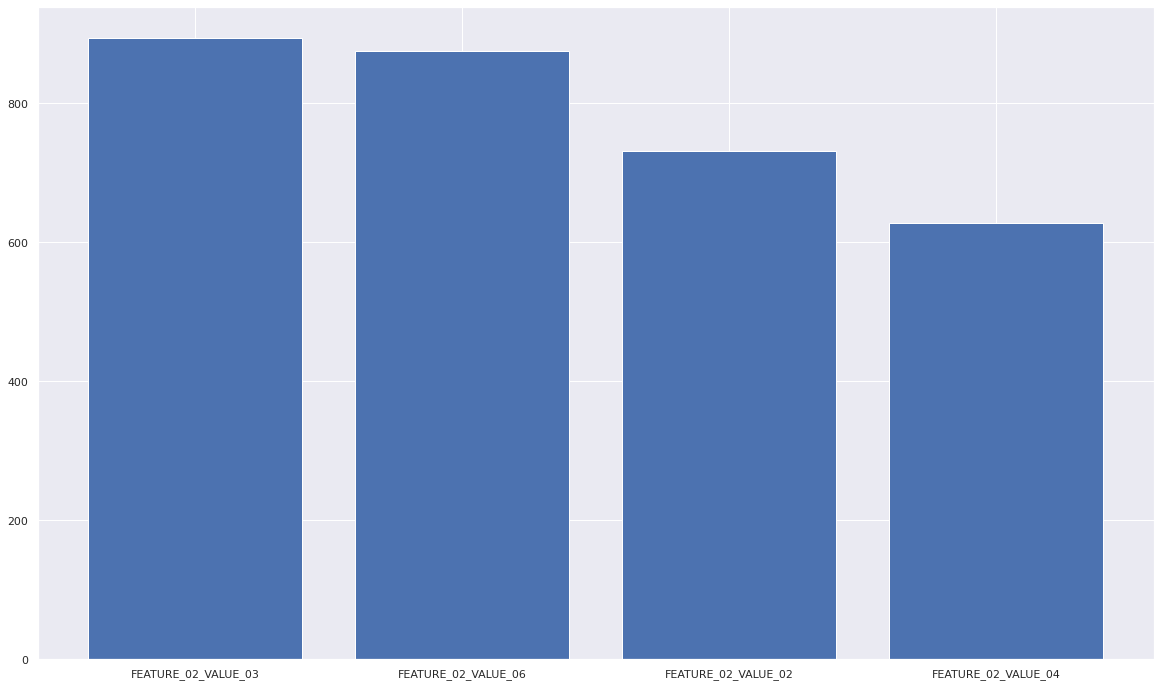

In [27]:
plt.figure(figsize=(20,12))
plt.bar(f02_counts.index, height=f02_counts)
plt.show()

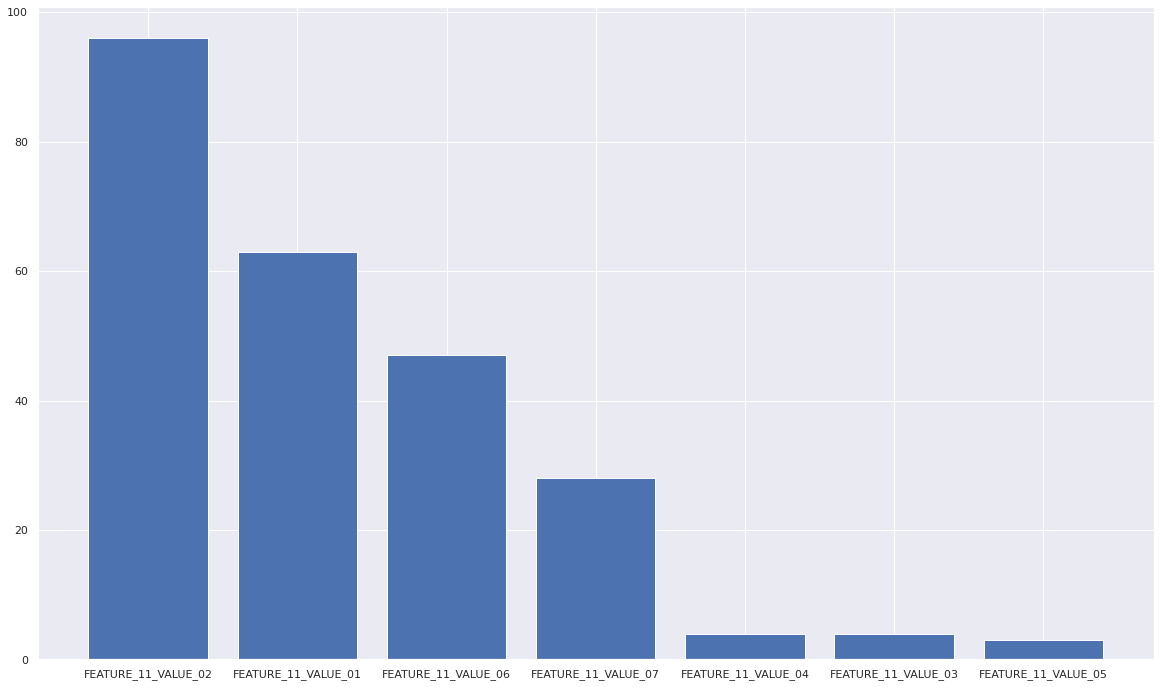

In [17]:
plt.figure(figsize=(20,12))
plt.bar(f11_counts.index, height=f11_counts)
plt.show()

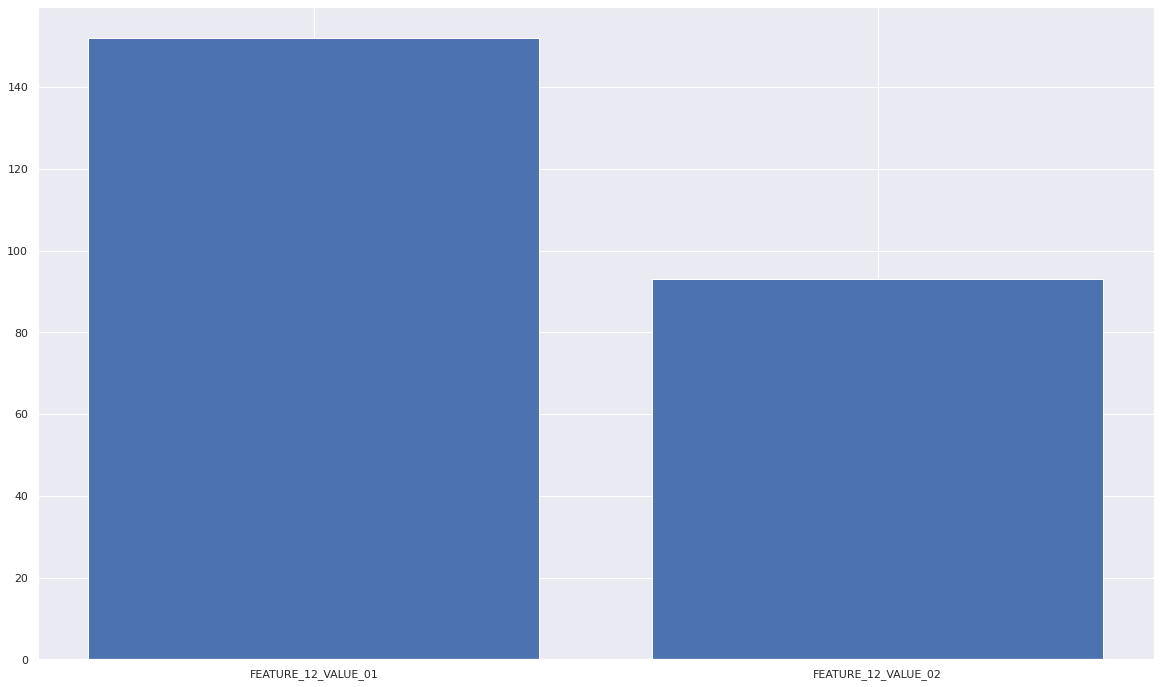

In [18]:
plt.figure(figsize=(20,12))
plt.bar(f12_counts.index, height=f12_counts)
plt.show()

In [23]:
lja_dummy_df = pd.get_dummies(lja_df, columns=['feature_01', 'feature_05', 'feature_11', 'feature_12'])

In [24]:
lja_dummy_df

,cod_loja,cod_ap,cod_municipio,feature_02,feature_03,feature_04,feature_06,feature_07,feature_08,feature_09,...,feature_05_FEATURE_05_VALUE_08,feature_11_FEATURE_11_VALUE_01,feature_11_FEATURE_11_VALUE_02,feature_11_FEATURE_11_VALUE_03,feature_11_FEATURE_11_VALUE_04,feature_11_FEATURE_11_VALUE_05,feature_11_FEATURE_11_VALUE_06,feature_11_FEATURE_11_VALUE_07,feature_12_FEATURE_12_VALUE_01,feature_12_FEATURE_12_VALUE_02
0,1,4125506005002,4125506,FEATURE_02_VALUE_04,True,21.76,31,0.168922,0.167659,115.958848,...,0,0,0,0,0,0,0,0,0,0
1,2,5300108005004,5300108,FEATURE_02_VALUE_03,True,22.00,27,0.215967,0.197287,1562.674817,...,0,0,0,0,0,0,0,0,0,0
2,3,3550308005052,3550308,FEATURE_02_VALUE_03,True,45.66,6,0.190102,0.179140,5593.905463,...,0,0,0,0,0,0,0,0,0,0
3,4,3145604003002,3145604,FEATURE_02_VALUE_04,False,30.00,3,0.141988,0.143677,12.824022,...,0,0,0,0,0,0,0,0,0,0
4,5,1600303005010,1600303,FEATURE_02_VALUE_02,False,62.49,30,0.107619,0.103083,325.531120,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3682,5105259003002,5105259,FEATURE_02_VALUE_04,False,30.16,5,0.210289,0.167499,36.397933,...,0,0,0,0,0,0,0,0,0,0
3126,3683,2604106003003,2604106,FEATURE_02_VALUE_02,False,38.00,13,0.146264,0.152495,163.567629,...,0,0,0,0,0,0,0,0,0,0
3127,3685,4115804003002,4115804,FEATURE_02_VALUE_04,False,44.04,7,0.226926,0.240253,16.862438,...,0,0,0,0,0,0,0,0,0,0
3128,3686,3509700003001,3509700,FEATURE_02_VALUE_06,False,31.76,4,0.134354,0.136028,20.565405,...,0,0,0,0,0,0,0,0,0,0


In [66]:
pib_df = pd.read_csv(my_dir + "dados_pib.csv")
micro_df = pd.read_csv(my_dir + "dados_ppib_micro.csv")
meso_df = pd.read_csv(my_dir + "dados_ppib_meso.csv")
uf_df = pd.read_csv(my_dir + "dados_ppib_uf.csv")
imp_df = pd.read_csv(my_dir + "impostos.csv")

pib_df = pib_df.merge(micro_df)
pib_df = pib_df.merge(meso_df)
pib_df = pib_df.merge(uf_df)
pib_df = pib_df.merge(imp_df)
pib_df.drop(columns=['nome_mun'], inplace=True)

pib_df.head()

,cod_mun,pib,pct_micro,pct_meso,pct_uf,impostos_liq
0,1100015,498864,9.08,2.15,1.15,28793
1,1100023,2296074,59.04,9.90,5.28,232012
2,1100031,138894,10.24,0.60,0.32,5494
3,1100049,2127523,38.73,9.17,4.89,217835
4,1100056,448524,33.06,1.93,1.03,63713


In [67]:
lja_pib_df = lja_df.merge(pib_df, left_on='cod_municipio', right_on='cod_mun')
lja_pib_df

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_15,feature_16,feature_17,feature_18,cod_mun,pib,pct_micro,pct_meso,pct_uf,impostos_liq
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,NaN,NaN,NaN,NaN,4125506,22581192,14.99,13.36,5.36,5739605
1,140,4125506005001,4125506,NaN,FEATURE_02_VALUE_02,True,56.84,FEATURE_05_VALUE_03,9,0.168922,...,100.0,100.0,93.2,95.7,4125506,22581192,14.99,13.36,5.36,5739605
2,1205,4125506005002,4125506,NaN,FEATURE_02_VALUE_02,True,29.30,FEATURE_05_VALUE_03,1,0.168922,...,NaN,NaN,NaN,NaN,4125506,22581192,14.99,13.36,5.36,5739605
3,1305,4125506005001,4125506,NaN,FEATURE_02_VALUE_02,True,20.60,FEATURE_05_VALUE_06,1,0.168922,...,NaN,NaN,NaN,NaN,4125506,22581192,14.99,13.36,5.36,5739605
4,1610,4125506005001,4125506,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,True,63.58,FEATURE_05_VALUE_05,6,0.168922,...,100.0,100.0,71.4,85.2,4125506,22581192,14.99,13.36,5.36,5739605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,3653,5211503003002,5211503,NaN,FEATURE_02_VALUE_04,False,25.20,FEATURE_05_VALUE_06,4,0.235328,...,NaN,NaN,NaN,NaN,5211503,4144601,28.95,6.94,2.16,441877
2975,3654,5211503003004,5211503,FEATURE_01_VALUE_10,FEATURE_02_VALUE_04,False,46.29,FEATURE_05_VALUE_03,3,0.235328,...,NaN,NaN,NaN,NaN,5211503,4144601,28.95,6.94,2.16,441877
2976,3680,1507953003002,1507953,NaN,FEATURE_02_VALUE_06,False,29.00,FEATURE_05_VALUE_03,7,0.134789,...,NaN,NaN,NaN,NaN,1507953,846501,23.50,4.56,0.55,77508
2977,3682,5105259003002,5105259,NaN,FEATURE_02_VALUE_04,False,30.16,FEATURE_05_VALUE_03,5,0.210289,...,100.0,100.0,97.1,97.6,5105259,3720050,23.15,7.86,2.93,439998


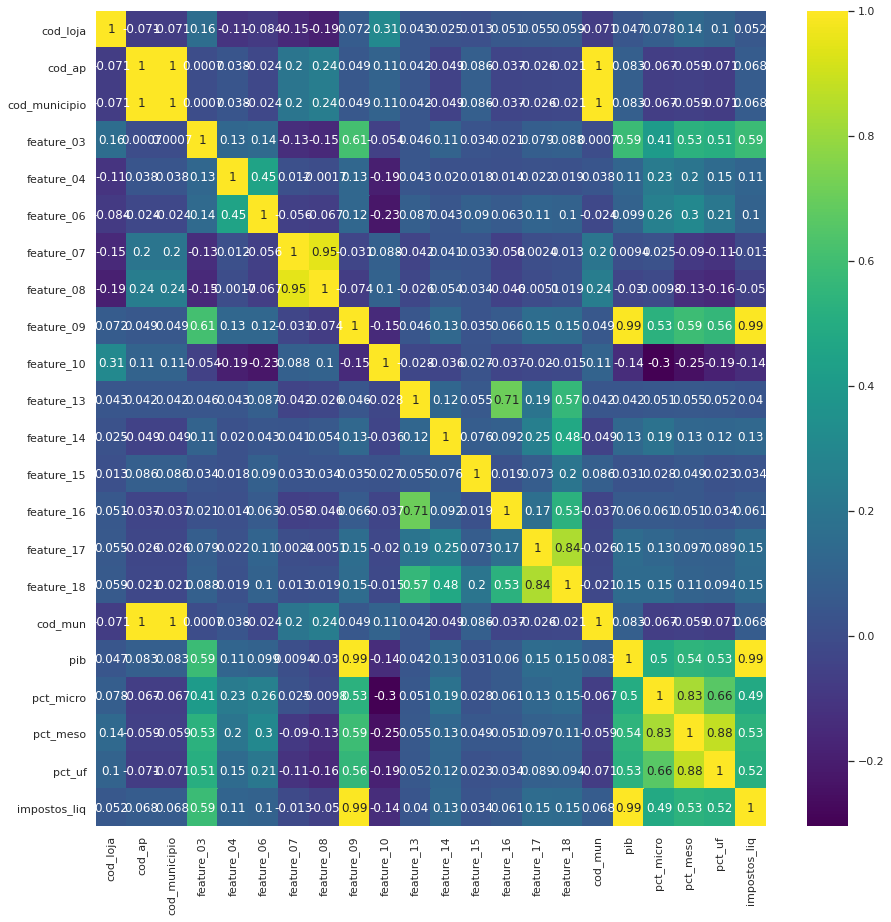

In [70]:
ljs_corr = lja_pib_df.corr()
#pib_cols = ['pib', 'pct_micro', 'pct_meso', 'pct_uf', 'impostos_liq']
#del_cols = ljs_corr.columns[~ljs_corr.columns.isin(pib_cols)].values
#ljs_corr.drop(columns=del_cols, inplace=True)
plt.figure(figsize=(15,15))
sns.heatmap(ljs_corr, annot=True, cmap='viridis');